<a href="https://colab.research.google.com/github/eduardof-rabelo/Vis-oComputacional/blob/main/Operacoes-pontuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imagens

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Upload de Imagens para o código.

Algumas imagens tinham a camada de cor Alpha, por isso foi necessário acrescentear um Dropout dessa camada.

In [2]:
img_lenna = '/content/drive/MyDrive/Mestrado/Disciplinas/lenna.png'
img_panda = '/content/drive/MyDrive/Mestrado/Disciplinas/panda.png'
img_fusca = '/content/drive/MyDrive/Mestrado/Disciplinas/fusca.png'
img_micro = '/content/drive/MyDrive/Mestrado/Disciplinas/microscopio.png'
img_micro2 = '/content/drive/MyDrive/Mestrado/Disciplinas/micro2.png'
lenna, panda, fusca, micro, micro2= imread(img_lenna), imread(img_panda), imread(img_fusca), imread(img_micro), imread(img_micro2)

#Dropout
fusca, micro, micro2 = fusca[:,:,:3], micro[:,:,:3], micro2[:,:,:3]

img_homem1 = '/content/drive/MyDrive/Mestrado/Disciplinas/homem1.png'
img_homem2 = '/content/drive/MyDrive/Mestrado/Disciplinas/homem2.png'
homem1, homem2 = imread(img_homem1), imread(img_homem2)

Funções de normalização e conversão de cores utilizadas:

In [133]:
def normalize_array(im):
    """
    Normaliza uma np.array entre 0 e 255.

    Parâmetros:
    array (np.array): A array a ser normalizada.

    Retorna:
    np.array: A array normalizada.
    """
    if len(im.shape) == 2:
      min_val = np.min(im)
      max_val = np.max(im)
      normalized_array = 255 * ((im - min_val) / (max_val - min_val))
      im = normalized_array.astype(np.uint8)
    else:
      for i in range(3):
        array = im[:,:,i]
        min_val = np.min(array)
        max_val = np.max(array)
        normalized_array = 255 * ((array - min_val) / (max_val - min_val))
        im[:,:,i] = normalized_array.astype(np.uint8)

    return im.astype('uint8')

def rgb_to_gray(rgb : np.ndarray):
    """
    Conversão da imagem RGB para tons de cinza.

    Parâmetros:
    rbg (np.array): A imagem a ser normalizada.

    Retorna:
    np.array: A array normalizada.
    """
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [134]:
lenna_norm = normalize_array(lenna)
lenna_gray = rgb_to_gray(lenna_norm)

panda_norm = normalize_array(panda)
panda_gray = rgb_to_gray(panda_norm)

fusca_norm = normalize_array(fusca)
fusca_gray = rgb_to_gray(fusca_norm)

micro_norm = normalize_array(micro)
micro_gray = rgb_to_gray(micro_norm)

micro2_norm = normalize_array(micro2)
micro2_gray = rgb_to_gray(micro2_norm)

(None, None, None, None, None)

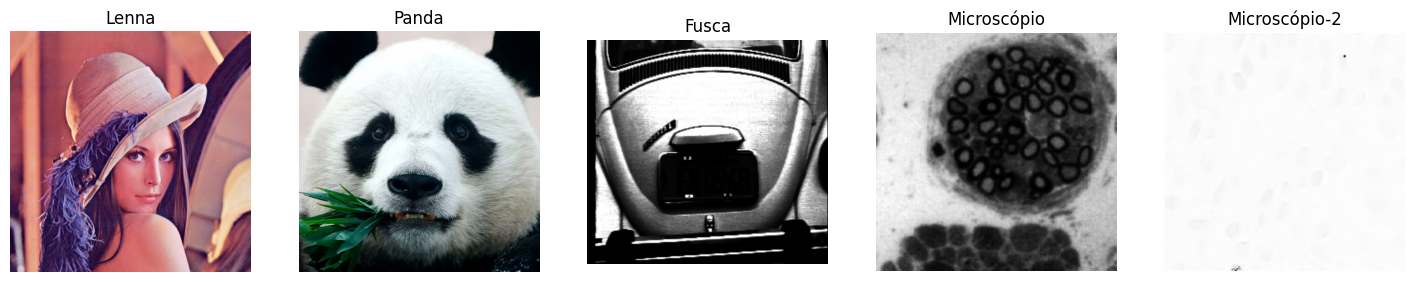

In [136]:
'''Plot de duas imagens utiizadas nas operações:
'''
f1, (y1, y2, y3, y4, y5) = plt.subplots(1,5, figsize = (18,18))

y1.imshow(lenna_norm, cmap="gray"), y2.imshow(panda_norm, cmap="gray"), y3.imshow(fusca_norm, cmap="gray"), y4.imshow(micro_norm, cmap="gray"), y5.imshow(micro2_norm, cmap="gray")

y1.set_title("Lenna"), y2.set_title("Panda"), y3.set_title("Fusca"), y4.set_title("Microscópio"), y5.set_title("Microscópio-2")
y1.set_axis_off(), y2.set_axis_off(), y3.set_axis_off(), y4.set_axis_off(), y5.set_axis_off()

Funções utilizadas nas operações pontuais:


*   Adição;
*   Subtração;
*   Multiplicação;
*   Logaritmo;
*   Exponencial.



In [141]:
def soma_img(im1 : np.ndarray ,x : float, im2 : np.ndarray, y : float):
  """
  Adição de imagens

  Parâmetros:
  im1 (np.ndarray): Imagem 1
  x (float): Peso/Fator de contribuição da Imagem 1 um na operação.

  im2 (np.ndarray): Imagem 2
  y (float) : Peso/Fator de contribuição da Imagem 2 um na operação.

  Retorna:
  np.array: A soma das arrays das Imagens 1 e 2.
  """
  img = x*im1 + y*im2
  return img.astype('uint8')

def subtract_img(im1 : np.ndarray, im2 : np.ndarray):
  """
  Subtração de imagens.
      Nesse caso, temos um Thresholding implicito dentro da função que zera
      qualquer valor menor do que 50 e atribui valor máximo para qualquer valor
      maior que 205 com a finalidade de evitar ruídos na Imagem resultante.

  Parâmetros:
  im1 (np.ndarray): Imagem 1
  im2 (np.ndarray): Imagem 2

  Retorna:
  np.array: A subtração das arrays das Imagens 1 e 2.
  """
  img = np.subtract(im1,im2)
  img = normalize_array(img)

  #Threshold
  img[img < 50] = 0
  img[img >= 205] = 255

  return img.astype('uint8')

def multiply_img(im1 : np.ndarray, im2 : np.ndarray):
  """
  Multiplicação de imagens

  Parâmetros:
  im1 (np.ndarray): Imagem 1

  im2 (np.ndarray): Imagem 2

  Retorna:
  np.array: A multiplicação das arrays das Imagens 1 e 2.
  """
  img = im1*im2

  return img.astype('uint8')

def log_img(im1 : np.ndarray):
  """
  Conversão em escala Logaritmica

  Parâmetros:
  im1 (np.ndarray): Imagem

  Retorna:
  np.array: A Imagem convertida em escala logarítimica normalizada entre 0 e 255.
  """
  c = 255 / np.log(1 + 0.5*np.max(im1))
  img = c * (np.log(0.5*im1 + 1))

  return img.astype('uint8')

def exp_img(im1: np.ndarray):
  """
  Conversão em escala Exponencial

  Parâmetros:
  im1 (np.ndarray): Imagem

  Retorna:
  np.array: A Imagem convertida em escala exponencial normalizada entre 0 e 255.
  """
  c = 255 / np.exp(1 + 0.5*np.max(im1))
  img = np.exp(0.5*im1 + 1) * c
  return img.astype('uint8')

(None, None, None, None, None, None)

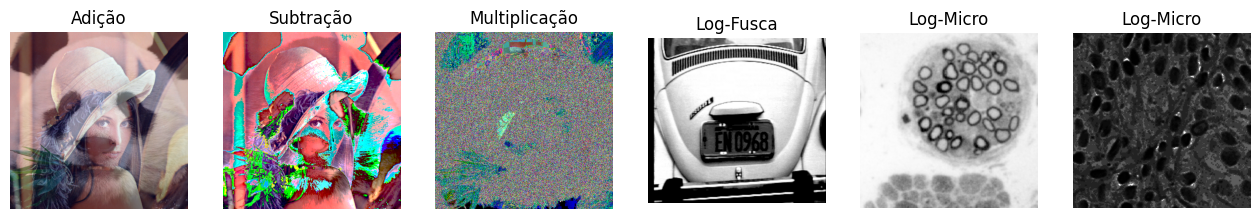

In [142]:
#Operação de Adição:
soma = soma_img(lenna_norm, 0.5, panda_norm, 0.5)
soma = normalize_array(soma)

#Operação de Subtração:
subtracao = subtract_img(lenna_norm, panda_norm)
subtracao = normalize_array(subtracao)

#Operação de Multiplicação:
multiplicacao = multiply_img(lenna_norm, panda_norm)
multiplicacao = normalize_array(multiplicacao)

#Operação Logarítimica:
log1 = log_img(fusca_norm)
log2 = log_img(micro_norm)

#Operação Exponencial:
exp = exp_img(micro2_norm)
exp = normalize_array(exp)

#Subplot das operações:
f2, (k1, k2, k3, k4, k5, k6) = plt.subplots(1,6, figsize = (16,16))

k1.imshow(soma), k2.imshow(subtracao), k3.imshow(multiplicacao), k4.imshow(log1), k5.imshow(log2), k6.imshow(exp)
#Definição de títulos e retirada de eixos:
k1.set_title("Adição"), k2.set_title("Subtração"), k3.set_title("Multiplicação"),k4.set_title("Log-Fusca"), k5.set_title("Log-Micro"), k6.set_title("Log-Micro")
k1.set_axis_off(), k2.set_axis_off(), k3.set_axis_off(), k4.set_axis_off(), k5.set_axis_off(), k6.set_axis_off()

## Movimento por subtração:

(None, None, None)

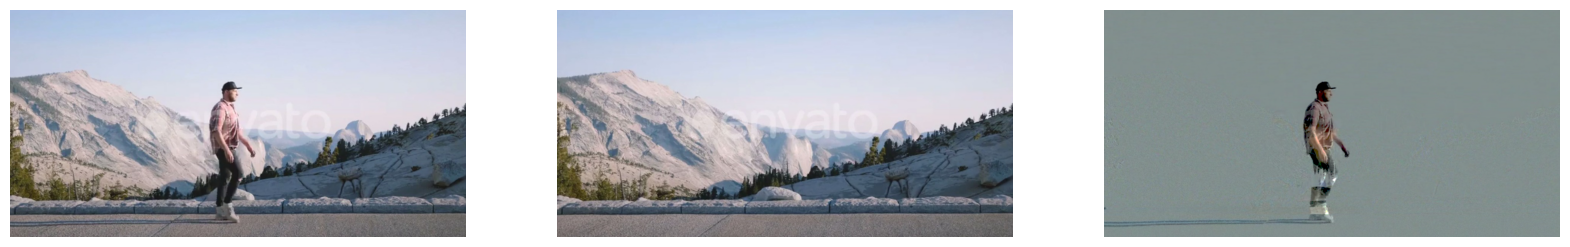

In [7]:
f3, (l1, l2, l3) = plt.subplots(1,3, figsize = (20,16))

sub_homem = subtract_img(homem1, homem2)

l1.imshow(homem1), l2.imshow(homem2), l3.imshow(sub_homem)

l1.set_axis_off(), l2.set_axis_off(), l3.set_axis_off()

# Histogramas

In [8]:
'''Função de construção do histograma da figura.
1. Faz verificação da quantidade de canais da Imagem. No caso de trabalharmos com
mais de um canal de cor optaremos por utilizar níveis de cinza para as análises;
2. Constrói o Histograma com 256 bins a partir da matriz da Imagem;
3. Posicionamento das colunas na plot;
4. Plot do Histograma.

A função retorna os parâmetros utilizados na criação do histograma, i.e. retorna
o np.array com a quantidade de ocorrência para cada nível de cor.
'''
def histograma_imagem(imagem, i, cor):
    if len(imagem.shape) > 2:
        imagem = np.dot(imagem[...,:3], [0.2989, 0.5870, 0.1140])

    hist, bins = np.histogram(imagem.flatten(), bins=256, range=[0,256])

    bin_centers = 0.5*(bins[:-1] + bins[1:])

    i.bar(bin_centers, hist, width=1, color = cor)

    return hist

def histograma_imagem_plot(imagem, i, cor):
    if len(imagem.shape) > 2:
          imagem = np.dot(imagem[...,:3], [0.2989, 0.5870, 0.1140])

    hist, bins = np.histogram(imagem.flatten(), bins=256, range=[0,256])

    bin_centers = 0.5*(bins[:-1] + bins[1:])

    i.plot(bin_centers, hist, color = cor)

    return hist

'''Função auxiliar para plotar o histograma de cada um dos canais de cor (quando
houver) + o canal cinza em um único plot indicando no final a imagem analisada.
'''
def plt_hist(im : np.ndarray):

  g, (g1, g2, g3, g4) = plt.subplots(1,4, figsize=(12,3))
  #Canal de cor Vermelho (R):
  histograma_imagem(im[:,:,0], g1, 'red')
  #Canal de cor Vermelho (G):
  histograma_imagem(im[:,:,1], g2, 'green')
  #Canal de cor Vermelho (B):
  histograma_imagem(im[:,:,2], g3, 'blue')
  #Níveis de Cinza:
  histograma_imagem(im, g4, 'gray')
  g.supylabel('Frequência'), g.supxlabel('Níveis')

  #Imagem Fonte:
  g4 = g.add_axes([0.6, 0.2, 1, .5])
  g4.imshow(im)

'''Função responsável por retornar apenas o histograma dos níveis de cinza e a
np.array com índices e frequências de cada nível.

** Ignora os outros canais e observa apenas os níveis de cinza**
'''
def get_gray_hist(im1, c):
  fig, ax = plt.subplots(1, figsize=(4,4))
  ax.set_xlabel("Níveis")
  ax.set_ylabel("Frequência")
  ax.set_xlim(1,255)
  return histograma_imagem_plot(im1, ax, c)

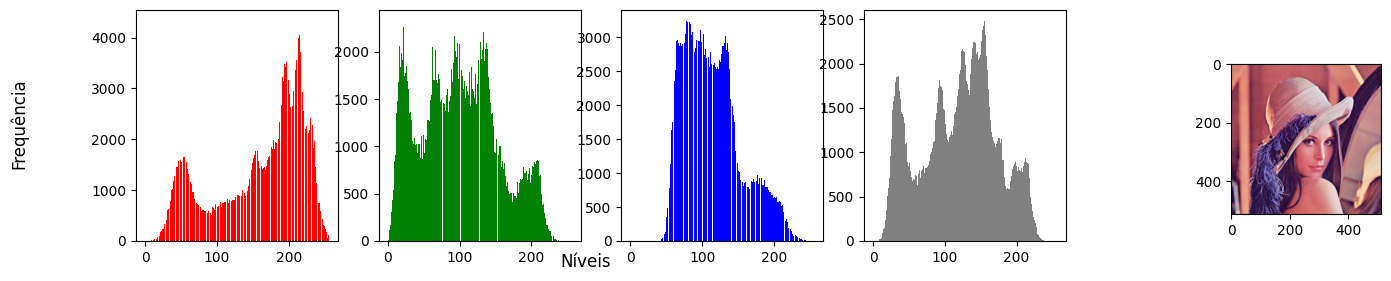

In [9]:
plt_hist(lenna_norm)

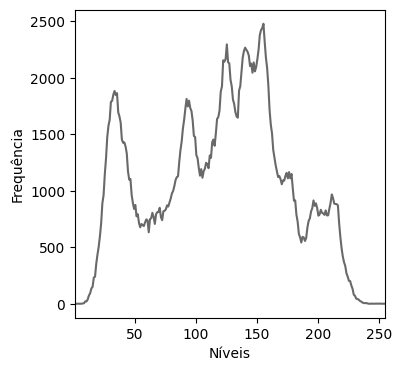

In [10]:
hist_array = get_gray_hist(lenna_norm, 'dimgray')

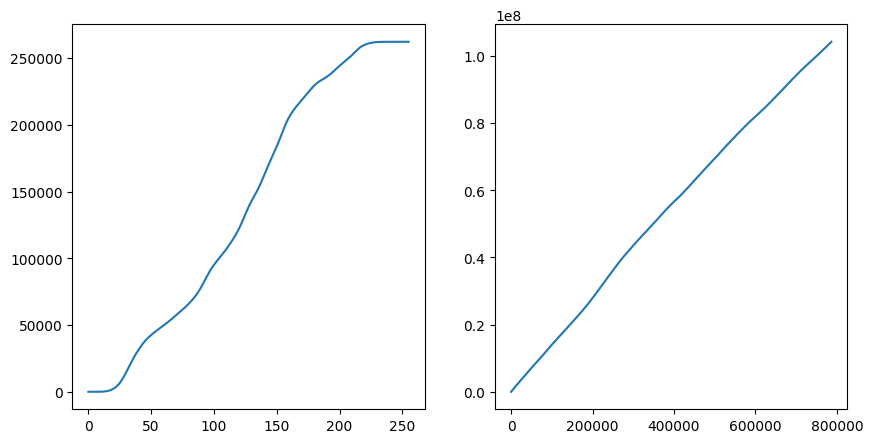

In [11]:
'''Função que pega a soma cumulativa a partir da np.array que contém as
informações necessárias para construir o histograma da figura.
Índice x Frequência
'''
cs = np.cumsum(hist_array)

fig = plt.figure(figsize=(4,4))
fig.set_figheight(5)
fig.set_figwidth(10)

fig.add_subplot(121)
plt.plot(cs)

'''Normalizando as soma cumulativa do histograma, obetendo os parêmetros
variando entre 0 e 255.
'''
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()
cs = nj / N
cs = cs.astype('uint8')

equalization = cs[lenna_norm]
equalization = np.reshape(equalization, lenna_norm.shape)

cs = np.cumsum(equalization)

fig.add_subplot(122)
plt.plot(cs)
plt.show(block=True)

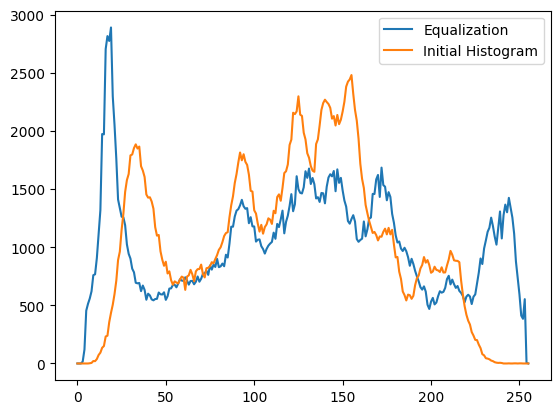

In [12]:
"""Arrays do Histograma Equalizado, Histograma Original e Comprimido:
"""
plt.ioff()
#Equalizado
hist_eq = get_gray_hist(equalization, 'orange')
#Original
hist_array = get_gray_hist(lenna_norm, 'dimgray')
#Stretch/Compressão

#Plot dos Histogramas sobrepostos
fig, ax = plt.subplots(1,1)
ax.plot(hist_eq, label="Equalization")
ax.plot(hist_array, label="Initial Histogram")
#ax.plot(hist_stretch, label ='Stretch Histogram')
ax.legend()
plt.ion()

fig

##Compressão e Descompressão de Histogramas:

## Otsu Thresholding

In [127]:
def thresholding(im : np.ndarray, L):
  im_tr = 255*np.ones(im.shape).astype(np.uint8)
  im_tr[np.where(im < L)] = 0
  return im_tr

def otsu_thresholding(im : np.ndarray, max_L):

  M = np.product(im.shape)
  min_var = []
  hist_t,_ = np.histogram(im, bins=256, range=(0,256))

  im_t = thresholding(im, 0)

  for L in np.arange(1, max_L):
    im_ti = thresholding(im, L)

    w_a = np.sum(hist_t[:L])/float(M)
    w_b = np.sum(hist_t[L:])/float(M)

    sig_a = np.var(im[np.where(im_ti == 0)])
    sig_b = np.var(im[np.where(im_ti == 255)])

    min_var = min_var + [w_a*sig_a + w_b*sig_b]

  im_t = thresholding(im, np.argmin(min_var))

  return im_t, np.argmin(min_var)

<ipython-input-129-80d0a1355b53>:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  img_otsu, OL = otsu_thresholding(otsu_image, int(mean_otsu))


(None, None, None)

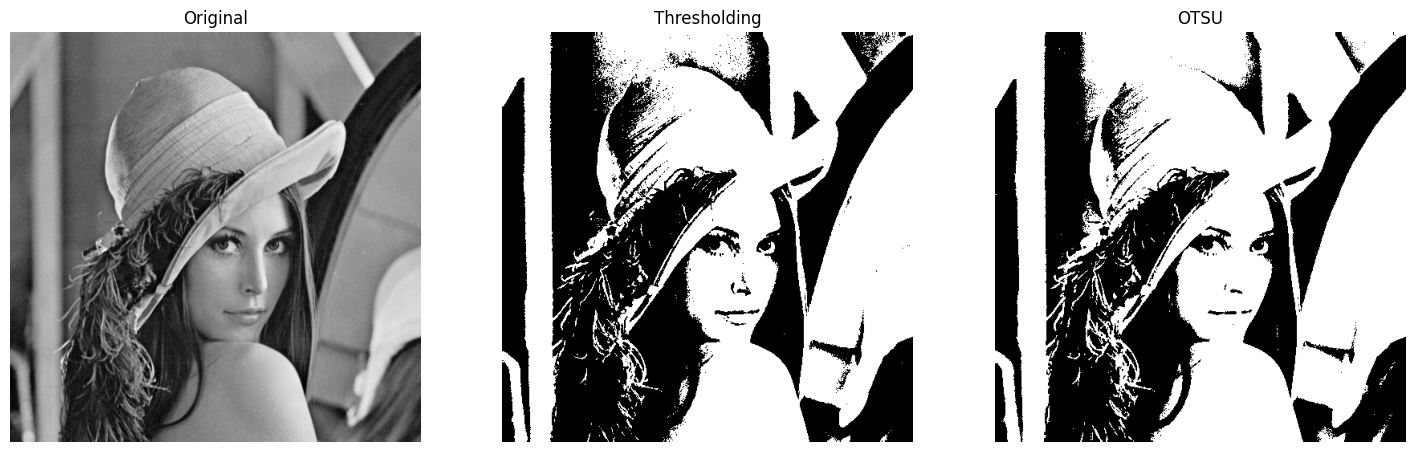

In [129]:
#Imagem utilizada no exemplo e normalização:
otsu_image = lenna_gray
otsu_image = normalize_array(otsu_image)

#Aplicação do método de thresholding básico:
mean_otsu = np.mean(otsu_image)
otsu = thresholding(otsu_image, mean_otsu)

#Aplicação do método OTSU:
img_otsu, OL = otsu_thresholding(otsu_image, int(mean_otsu))

fig, ax1 = plt.subplots(1,3, figsize = (18,18))
ax1[0].imshow(otsu_image, cmap = 'gray'), ax1[1].imshow(otsu, cmap ='gray'), ax1[2].imshow(img_otsu, cmap ='gray')
ax1[0].set_title("Original"), ax1[1].set_title("Thresholding"), ax1[2].set_title("OTSU")
ax1[0].set_axis_off(), ax1[1].set_axis_off(), ax1[2].set_axis_off()